In [45]:
!pip install imblearn

In [6]:
from google.colab import files
uploaded = files.upload()

Saving creditcard.csv to creditcard.csv


In [9]:
import pandas as pd
import numpy as np
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [16]:
# number of missing value
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [19]:
# distribution of legit transaction
df['Class'].value_counts()

,count
Class,
0,284315
1,492


## This dataset is highly unbalanced
0---> normal transaction
1---> fraudulent transaction

In [20]:
legit = df[df.Class == 0]
fraud = df[df.Class == 1]

In [22]:
print(legit.shape)
print(fraud.shape)


(284315, 31)
(492, 31)


In [26]:
#statistical measure for the data
print(legit.Amount.describe())
print(fraud.Amount.describe())

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


In [27]:
#compare the values for both transaction
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


## Features V1–V28 are PCA-transformed and already scaled, but Amount and Time need normalization.


In [32]:
# The dataset has columns: Time, V1–V28, Amount, and Class.
# Features V1–V28 are already PCA-transformed and scaled, but Amount and Time need normalization.
# Create a feature set (X) excluding the Class column
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['Amount_scaled'] = scaler.fit_transform(df[['Amount']])
df['Time_scaled'] = scaler.fit_transform(df[['Time']])
X = df.drop(['Amount','Time'],axis=1)



In [47]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
X = df.drop(['Class'],axis=1)
y = df['Class']
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)
smote = SMOTE(random_state=42)
X_train_smote,y_train_smote = smote.fit_resample(X_train,y_train)



## Apply Isolation Forest to Create the 'anomaly' Column


In [48]:
## Isolation Forest is ideal for this dataset because it’s efficient for high-dimensional data and designed to detect rare outlier
from sklearn.ensemble import IsolationForest
# Initialize and train Isolation Forest
iso = IsolationForest(contamination=0.0017,random_state=42)
df['anomaly'] = iso.fit_predict(X)
df['anomaly'] = df['anomaly'].map({1: 0, -1: 1})
print(df[['anomaly']].value_counts())

anomaly
0          284322
1             485
Name: count, dtype: int64


Classification Report (anomaly vs. Class):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.19      0.19      0.19       492

    accuracy                           1.00    284807
   macro avg       0.60      0.59      0.59    284807
weighted avg       1.00      1.00      1.00    284807



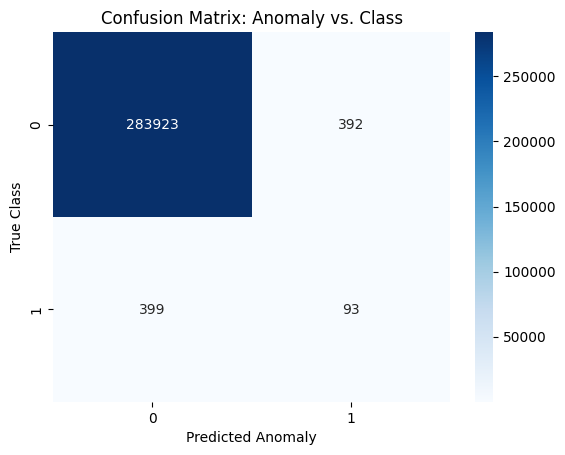

In [49]:
## To understand how well the anomalies align with frauds, compare the 'anomaly' column with the Class column:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Classification report
print("Classification Report (anomaly vs. Class):")
print(classification_report(df['Class'], df['anomaly']))

# Confusion matrix
cm = confusion_matrix(df['Class'], df['anomaly'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Anomaly')
plt.ylabel('True Class')
plt.title('Confusion Matrix: Anomaly vs. Class')
plt.show()

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
lr = LogisticRegression(random_state=42)
lr.fit(X_train_smote, y_train_smote)
y_pred = lr.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.12      0.89      0.21        98

    accuracy                           0.99     56962
   macro avg       0.56      0.94      0.60     56962
weighted avg       1.00      0.99      0.99     56962



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Roc curve is: 0.9811600252087329


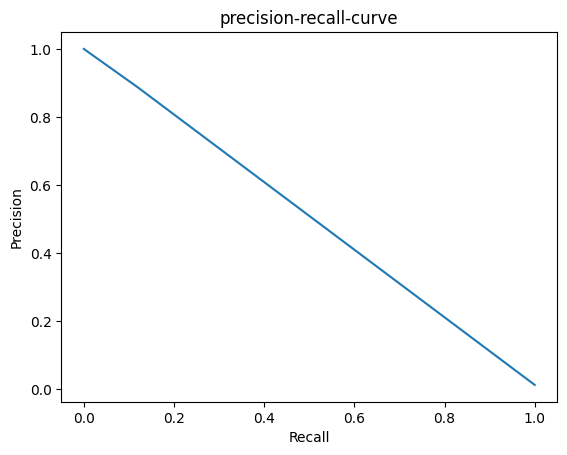

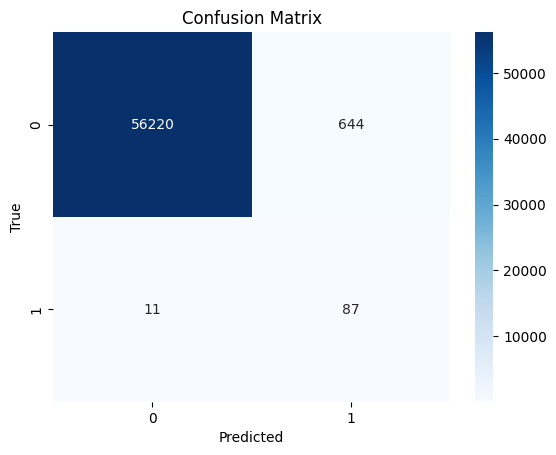

In [59]:
from sklearn.metrics import roc_auc_score, precision_recall_curve, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
#roc curve
y_pred_prob = lr.predict_proba(X_test)[:, 1]
roc_curve = roc_auc_score(y_test, y_pred_prob)
print("Roc curve is:",roc_curve)
# precision-Recall curve
precision, recall, _ = precision_recall_curve(y_pred, y_test)
plt.plot(recall,precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('precision-recall-curve')
plt.show()
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()